## DATASET LINK - https://www.kaggle.com/c/instacart-market-basket-analysis/data

# Recommender System
## Market Basket Analysis on Insta Cart Dataset

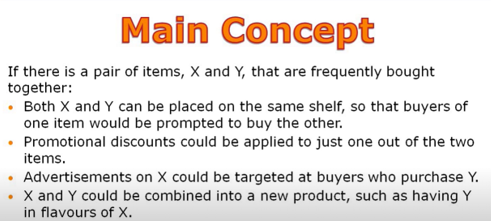

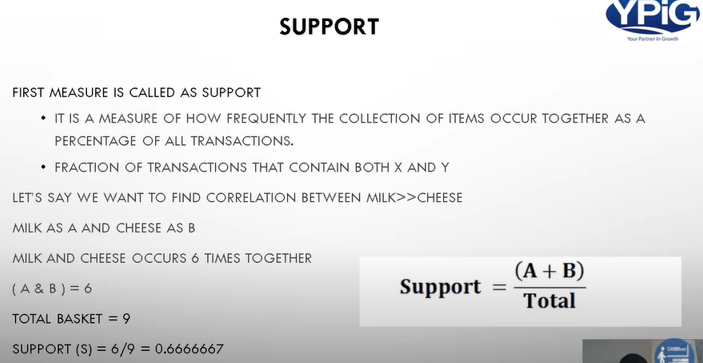

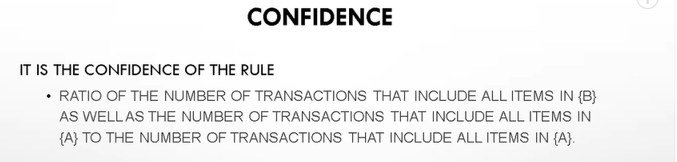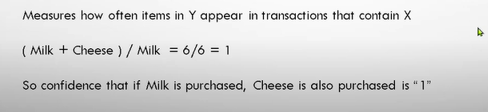

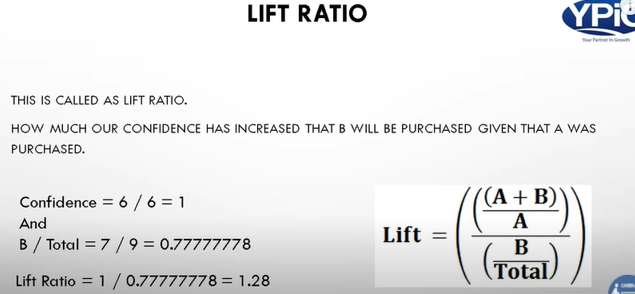

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
# !pip install mlxtend
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
import zipfile

In [2]:
orders = pd.read_csv('c:/users/shekh/Desktop/GitProjects/Market_Basket/order_products__prior.csv/order_products__prior.csv')


In [3]:
products = pd.read_csv('c:/users/shekh/Desktop/GitProjects/Market_Basket/products.csv/products.csv')

In [4]:
orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
order_products_prior = pd.merge(orders, products, on='product_id', how='inner')

In [7]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [8]:
cnt_srs = order_products_prior['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs.head()

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584


In [9]:
order_products_prior = order_products_prior[order_products_prior['order_id']<10000]

In [10]:
df_item = order_products_prior[['order_id','product_name']].copy()
df_item.rename(columns={'order_id':'order','product_name':'items'},inplace=True)
df_item['temp']=1

In [11]:
df_item.head()

,order,items,temp
0,2,Organic Egg Whites,1
1,26,Organic Egg Whites,1
2,120,Organic Egg Whites,1
3,327,Organic Egg Whites,1
4,390,Organic Egg Whites,1


Making transaction data ready for Frequent item set mining.



In [12]:
df = df_item.groupby(['order','items'])['temp'].sum().unstack().fillna(0)


An encoder to covert numbers greater than 1 to 1 and less than 0 to 0.



In [13]:
def myencoder(i):
    if i <= 0:
        return 0
    elif i>=1:
        return 1

In [ ]:
df.applymap(myencoder)

Frequent Itemsets Mining

In [ ]:
freq_itemsets = apriori(df,min_support=0.01,use_colnames=True)
freq_itemsets

#### Association Rules Mining

In [ ]:
rules = association_rules(freq_itemsets,metric='lift')
rules.sort_values(by='confidence',ascending=False)

In [ ]:
rules[(rules['confidence']>0.16) & (rules['lift']>1)].sort_values(by='confidence',ascending=False)